# Одномерная линейная регрессия

1. Выведите формулу обновления весов одномерной линейной регрессии методом градиентного спуска.

2. Напишите функцию, релизующую одномерной линейной регрессии методом градиентного спуска.

In [133]:
def linear_regression(X, y_true, m=0, b=0, epochs=1000, learning_rate=0.0001):
    N = float(len(y_true))
    for i in range(epochs):
        y_pred = m * X + b
        cost = (1. / N) * sum((y_true - y_pred)**2)
        
        m_gradient = (-2. / N) * X @ ((y_true - y_pred))
        b_gradient = (-2. / N) * sum(y_true - y_pred)
        
        m = m - learning_rate * m_gradient
        b = b - learning_rate * b_gradient        
        
    return m, b, cost

## Сгенерируем точки для задачи регрессии

Populating the interactive namespace from numpy and matplotlib


/Users/vladtitov/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


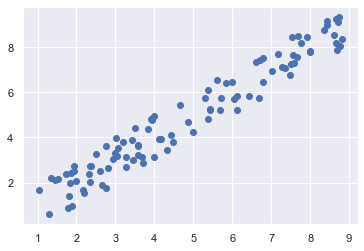

In [134]:
import random
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
%pylab inline

num_points = 100
m, b, delta = 1, 0, 1

x = np.array([random.uniform(1, 9) for i in range(num_points)])
y = np.array([random.uniform(m * x + b - delta, m * x + b + delta) for x in x])

plt.scatter(x, y)

### Обучим нашу линейную регрессию и посмотрим на результат

MSE: 0.3357156816607915


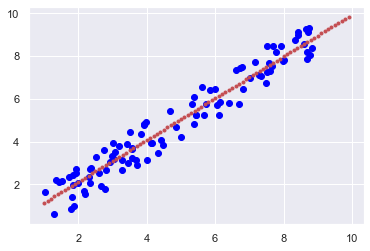

In [135]:
m, b, cost = linear_regression(x,y)

x_pr = np.arange(1, 10, 0.1)
y_pr = m * x_pr + b

plt.scatter(x, y, color='blue')
plt.plot(x_pr, y_pr, '.r')

print('MSE: {}'.format(cost))

# Задание 1

Поэкспериментируйте с количеством шагов (epochs) и learning rate.
Как меняется итоговая ошибка при фиксированном числе шагов и различных learning rate?

1) Постройте графики для learning rate = 0.1, 0.01, 0.0001 и epochs = 10, 100, 1000 (всего 9 графиков).
Рядом с каждым графиком выведите ошибку (cost).

2) Прокомментируйте каждый график: ответьте на вопрос, почему вы видите именно такую прямую?

epochs: 10, learning_rate: 0.1


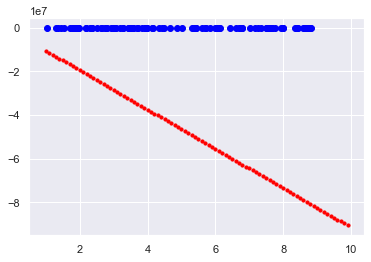

MSE: 100452779987480.36
epochs: 10, learning_rate: 0.01


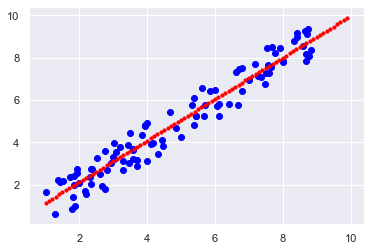

MSE: 0.33553568730668126
epochs: 10, learning_rate: 0.0001


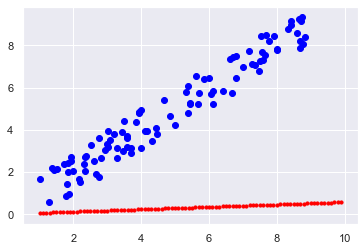

MSE: 26.78720865608461
epochs: 100, learning_rate: 0.1


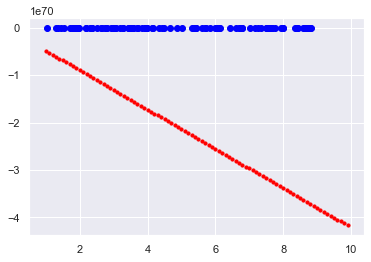

MSE: 2.1333029958496908e+139
epochs: 100, learning_rate: 0.01


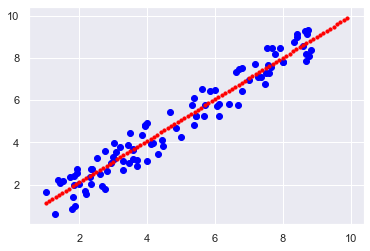

MSE: 0.3351418255986096
epochs: 100, learning_rate: 0.0001


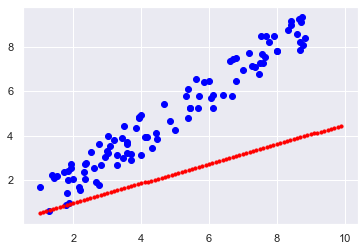

MSE: 9.33980199539639
epochs: 1000, learning_rate: 0.1


/Users/vladtitov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
/Users/vladtitov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


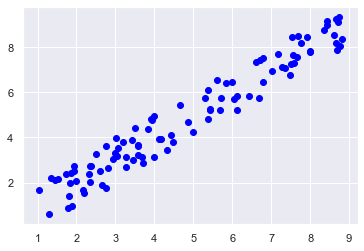

MSE: nan
epochs: 1000, learning_rate: 0.01


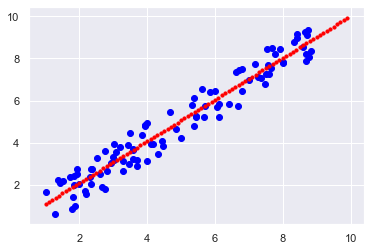

MSE: 0.33473108120479084
epochs: 1000, learning_rate: 0.0001


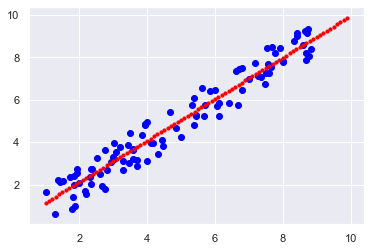

MSE: 0.3357156816607915


In [137]:
x_pr = np.arange(1, 10, 0.1)

for ep in [10, 100, 1000]:
    for lr in [0.1, 0.01, 0.0001]:
        print('epochs: {0}, learning_rate: {1}'.format(ep, lr))
        m, b, cost = linear_regression(x, y, epochs=ep, learning_rate=lr)
        y_pr = m * x_pr + b

        plt.scatter(x, y, color='blue')
        plt.scatter(x_pr, y_pr, color='red', s=10)
        plt.show()
        
        print('MSE: {}'.format(cost))        

# Задание 2

Подумайте, как применить написанную функцию линейной регрессии для аппроксимации следующего набора точек. Решите эту задачу. Выведите на экран итоговое приближение (график) и ошибку.

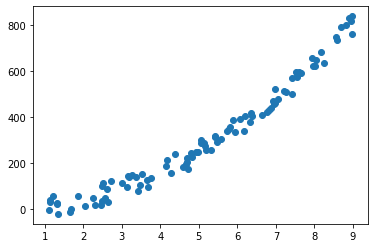

In [58]:
num_points = 100
m, b, delta = 10, 0, 50

x = np.array([random.uniform(1, 9) for i in range(num_points)])
y = np.array([random.uniform(m * x * x + b - delta, m * x * x + b + delta) for x in x])

plt.scatter(x, y)

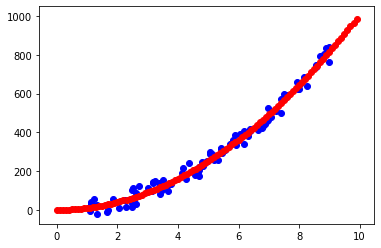

In [65]:
m, b, cost = linear_regression(x**2, y)

x_pr = np.arange(0, 10, 0.1)
y_pr = m * x_pr**2 + b

plt.scatter(x, y, c='b')
plt.scatter(x_pr, y_pr, c='r')

plt.show()

# Задание 3

Считайте файл weights_heights.csv

In [67]:
df = pd.read_csv("weights_heights.csv")
df.head()

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


Разбейте данные на тренировочную и валидационную часть и обучите линейную регрессию на тренировочной части (используйте функцию linear_regression для обучения)

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Height'], df['Weight'], test_size=0.2)

m, b, cost = linear_regression(X_train, y_train, learning_rate=0.00001)

Сделайте предсказание на тренировочной и тестовой части по формуле y=mx+b.

Вычислите MSE на train и на test.

In [85]:
from sklearn.metrics import mean_squared_error

pred_train = m * X_train + b
pred_test = m * X_test + b

print("Train MSE: {}".format(mean_squared_error(y_train, pred_train)))
print("Test MSE: {}".format(mean_squared_error(y_test, pred_test)))

Train MSE: 106.77899034050405
Test MSE: 107.51365023941116


# Теперь проверим, как работает функция линейной регрессии из sklearn

In [86]:
from sklearn.linear_model import LinearRegression

X_train2 = X_train.values.reshape(-1,1)
X_test2 = X_test.values.reshape(-1,1)

lr = LinearRegression()
lr.fit(X_train2,y_train)

pred_train = lr.predict(X_train2)
pred_test = lr.predict(X_test2)

print("Train MSE: {}".format(mean_squared_error(y_train, pred_train)))
print("Test MSE: {}".format(mean_squared_error(y_test, pred_test)))

Train MSE: 101.59059506083535
Test MSE: 101.6114143241405


Посмотрим на качество линейной регрессии на кросс-валидации.

In [87]:
from sklearn.model_selection import cross_val_score

print(-cross_val_score(lr, df[['Height']], df['Weight'], cv=5, scoring='neg_mean_squared_error').mean())

101.6076895569981


# Задание 4

Поработаем с датасетом Бостон.

In [88]:
from sklearn.datasets import load_boston

data = load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [89]:
X_full = data.data
y_full = data.target

Посмотрите на качество линейной регрессии (из sklearn) на кросс-валидации.

In [90]:
print(-cross_val_score(lr, X_full, y_full, cv=5, scoring='neg_mean_squared_error').mean())

37.13180746769922


Разбейте данные на train и test. Обучите линейную регрессию на train и сделайте предсказание на train и test.

Выведите MSE на train и на test.

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2)

lr = LinearRegression()
lr.fit(Xtrain, ytrain)

pred_train = lr.predict(Xtrain)
pred_test = lr.predict(Xtest)

print("Train MSE: {}".format(mean_squared_error(y_train, pred_train)))
print("Test MSE: {}".format(mean_squared_error(y_test, pred_test)))

Train MSE: 140.8669586457664
Test MSE: 135.10252106364214


In [97]:
lr.coef_

array([-1.33154340e-01,  5.86454268e-02,  1.37666257e-02,  2.74437727e+00,
       -1.75446664e+01,  3.30067472e+00, -1.60354656e-03, -1.58363420e+00,
        3.92815377e-01, -1.55343707e-02, -9.38704616e-01,  8.73613120e-03,
       -5.43762774e-01])

Нарисуем матрицу корреляций признаков.

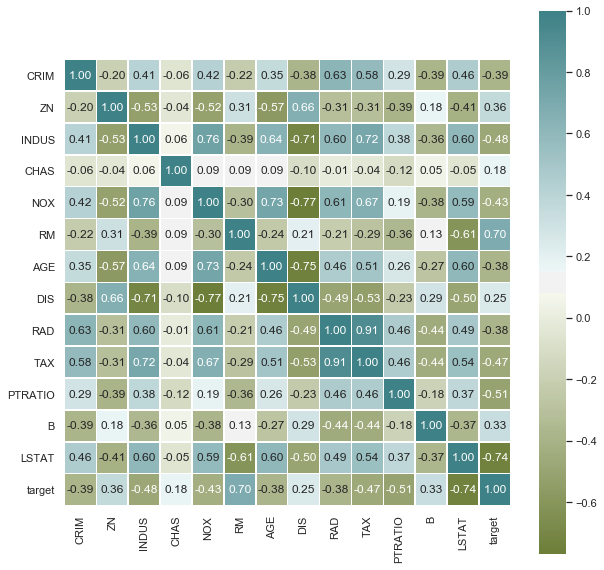

In [99]:
import seaborn as sns

data1 = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= list(data['feature_names']) + ['target'])

corr = data1.corr()
sns.set(rc={'figure.figsize':(10, 10)})
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.2f',mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(100,200, as_cmap=True), square=True)

In [101]:
np.corrcoef(data1['LSTAT'],data1['target'])[0][1]

-0.7376627261740148

Попробуйте убрать из данных признаки с наименьшей корреляцией с target (1, 2 или 3 признака) и обучить линейную регрессию на оставшихся признаках. Как изменилось качество?

In [106]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [131]:
X_cut = data1[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']].values

print(-cross_val_score(lr, X_cut, y_full, cv=5, scoring='neg_mean_squared_error').mean())

36.67713430722333
